<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 8

### Problem 0 (3 points)

## Part 1: Impurity

### Problem 1.1 (Exam Style)

Error rate impurity:
$$
1 - max \ [p \ (y=1|S),\ p \ (y=2|S),\ p \ (y=3|S),\ p \ (y=4|S)] = 1 - p \ (y=3|S) \\
 = 1 - \frac{105}{140} = 0.25
$$

Gini Index:
$$
G = 1 - \sum_{y \in Y} p^2(y|S) = 1 - [ p^2(y=1|S)+ p^2(y=2|S) + p^2(y=3|S) + p^2(y=4|S) ] \\
= 1 - [(\frac{21}{140})^2 + (\frac{0}{140})^2 + (\frac{105}{140})^2 + (\frac{14}{140})^2] \\
= 1 - (0.0225 + 0 + 0.5625 + 0.01) \\
= 1 - 0.595 = 0.405
$$

### Problem 1.2 (Exam Style)

$$
p \ (y=0|S_2) = p \quad \quad p \ (y=1|S_2) = 1 - p
$$

Error rate impurity:
$$
1 - max \ [p \ (y=0|S),\ p \ (y=1|S)] \\
= 1 - max \ (p, 1-p)
$$

Gini Index:
$$
1 - (p^2 + (1-p)^2) \\
= 1 - (p^2 + 1 - 2p + p^2) \\
= 2p - 2p^2
$$

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def plot(fct, x, title=None, font_size=18):
    y = fct(x)
    plt.figure(figsize=(15, 5), tight_layout=True)
    plt.plot(x, y)
    if title is not None:
        plt.title(title, fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)

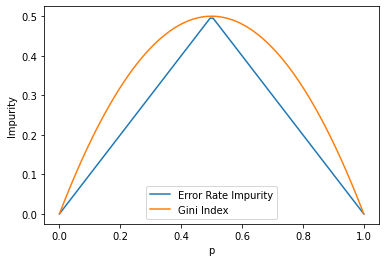

In [12]:
def error_rate(p):
    e_rates = []
    for i in p:
        e_rates.append(1 - max(i, 1-i))
    return e_rates

def gini_index(p):
    return 2*p - 2*p**2

p = np.linspace(0,1,100)


plt.plot(p, error_rate(p), label = "Error Rate Impurity")
plt.plot(p, gini_index(p), label="Gini Index")
plt.legend()
plt.xlabel("p")
plt.ylabel("Impurity")
plt.show()

## Part 2: Decision Trees as Partitions

In [15]:
from urllib.request import urlretrieve
from os import path as osp
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
%matplotlib inline

In [16]:
def bounding_box(xs, margin=0.5):
    mn, mx = np.min(xs, axis=0) - margin, np.max(xs, axis=0) + margin
    return {'left': mn[0], 'right': mx[0], 'bottom': mn[1], 'top': mx[1]}


def shade_box(box, color, alpha=0.2):
    pale_color = color.copy()
    pale_color[3] = alpha
    corner = box['left'], box['bottom']
    width, height = box['right'] - corner[0], box['top'] - corner[1]
    rectangle = Rectangle(corner, width, height,
                          edgecolor='none', facecolor=pale_color)
    plt.gca().add_patch(rectangle)

In [17]:
def retrieve(file_name, semester='fall21', course='371d', homework=8):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [20]:
def plot_data(data):
    box = bounding_box(data['x'])
    plt.figure(figsize=(12, 12), tight_layout=True)
    plt.plot((box['left'], box['right'], box['right'], box['left'], box['left']),
             (box['bottom'], box['bottom'], box['top'], box['top'], box['bottom']), 'k')
    colormap = ListedColormap(cm.tab10(range(len(np.unique(data['y'])))))
    plt.scatter(data['x'][:, 0], data['x'][:, 1], s=80, c=data['y'], cmap=colormap)
    plt.axis('equal')
    plt.axis('off')
    return box, colormap.colors

Using previously downloaded file small_set.pickle


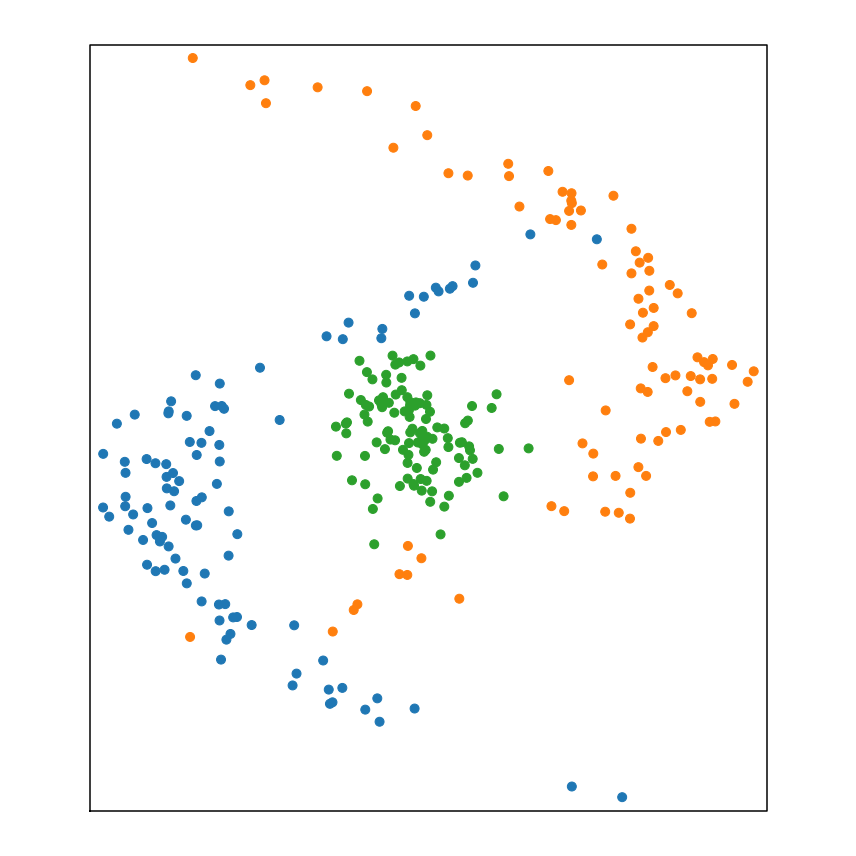

In [21]:
small_set_name = 'small_set.pickle'
retrieve(small_set_name)
with open(small_set_name, 'rb') as file:
    small_set = pickle.load(file)
plot_data(small_set)
plt.show()

### Problem 2.1

In [6]:
def replace_side(box, side, value):
    new = box.copy()
    new[side] = value
    return new

In [7]:
def draw_tree(t, b, colors):
    def draw(node, box):
        points = t.value[node]
        if t.children_left[node] < 0 and t.children_right[node] < 0:
            c = 0
            for i in range(len(colors)):
                if points[0,i] > 0:
                    c = i
                    continue
            shade_box(box, colors[c])
            plt.plot((box['left'], box['right'], box['right'], box['left'], box['left']),
             (box['bottom'], box['bottom'], box['top'], box['top'], box['bottom']), 'k')
            return node
        
        # differentiate between dim, so y-dim changes top/bottom of box & x-dim changes left/right
        dim = t.feature[node]
        if dim == 0:
            side_l = 'right'
            side_r = 'left'
        else:
            side_l = 'top'
            side_r = 'bottom'
        
        left_box = replace_side(box, side_l, t.threshold[node])
        right_box = replace_side(box, side_r, t.threshold[node])
        
        t.children_left[node] = draw(t.children_left[node], left_box)
        t.children_right[node] = draw(t.children_right[node], right_box)
        
        return node
    draw(0,b)
    
    plt.show()

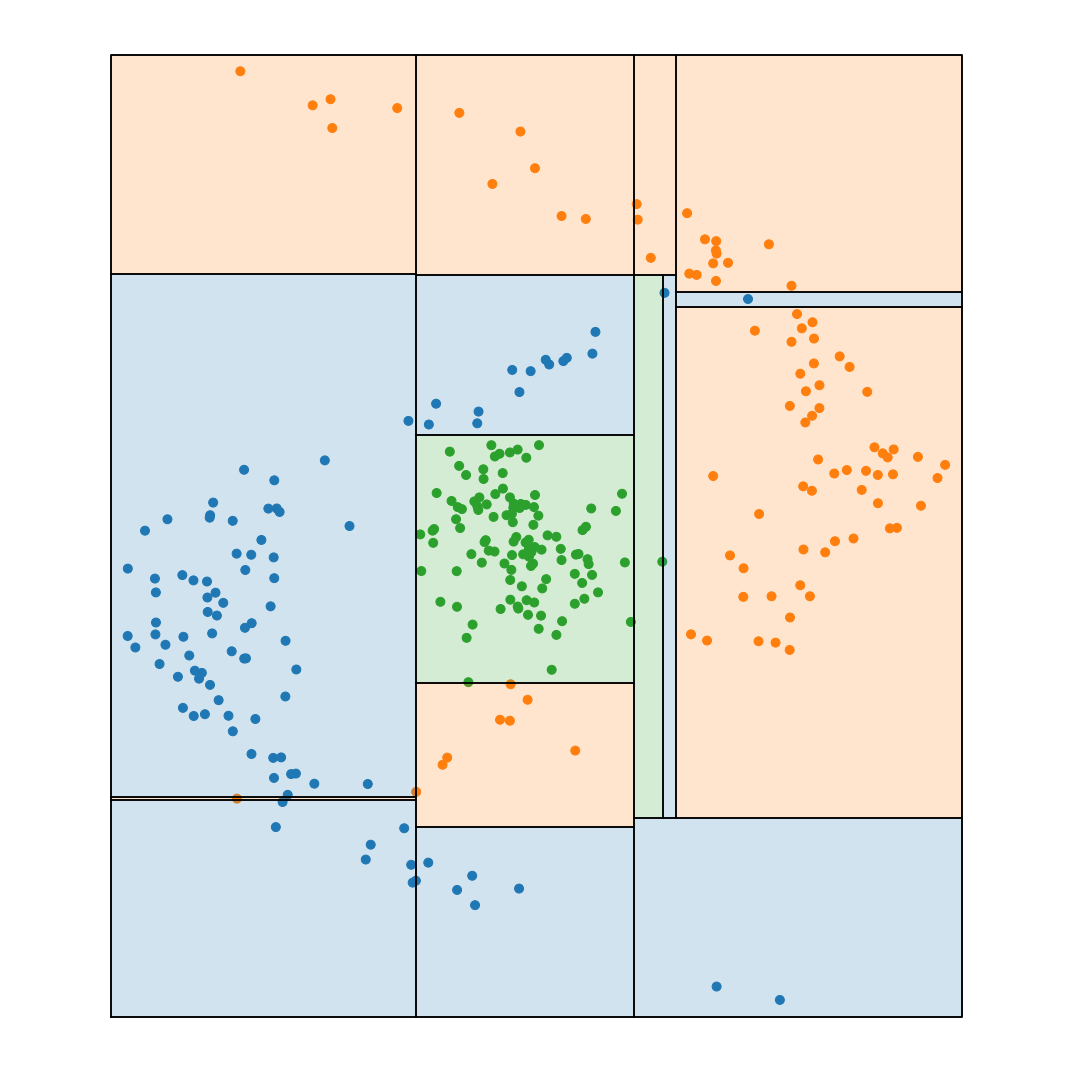

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
h = tree.fit(small_set['x'], small_set['y'])
t = h.tree_

bx, class_colors = plot_data(small_set)
draw_tree(t, bx, class_colors)

### Problem 2.2 (Exam Style)

There are a few regions where there appears to be only a single training point within the region. Like the region on the left side of the graph where there is a single orange point contained in a very narrow region surrounded by blue points on all sides. Similarly, on the right side of the graph, in the middle of the orange regions, there are 3 mna 

## Part 3: Trees and Forests 

In [9]:
from torchvision.datasets import MNIST
from sklearn.preprocessing import StandardScaler

In [10]:
def standardize(data, stats=None):
    if stats is None:
        scaler = StandardScaler().fit(data)
        data = scaler.transform(data).astype(np.float32)
        return data, {'mean': scaler.mean_, 'std': scaler.scale_}
    else:
        data -= stats['mean']
        data /= stats['std']
        return data

In [11]:
def load_mnist():
    data = {}
    for which in ('train', 'test'):
        is_train = True if which == 'train' else False
        d = MNIST('.', train=is_train, download=True)
        ds = {'x': d.data.numpy(), 'y': d.targets.numpy()}
        n, shape = ds['x'].shape[0], ds['x'].shape[1:]
        ds['x'] = ds['x'].reshape((n, -1)).astype(np.float32)
        ds['y'] = ds['y'].astype(np.uint8)
        data[which] = ds

    data['train']['x'], stats = standardize(data['train']['x'])
    stats['max'], stats['shape'] = np.max(data['train']['x']), shape
    data['test']['x'] = standardize(data['test']['x'], stats)

    return data, stats

In [12]:
def x_to_image(x, stats):
    x = np.round(x * stats['std'] + stats['mean'])
    x = np.clip(x * 255. / stats['max'], 0., 255.).astype(np.uint8)
    return np.reshape(x, stats['shape'])


def show_random_training_images(data, stats, rows=3, columns=6):
    xs, ys = data['train']['x'], data['train']['y']
    rng = np.random.default_rng()
    indices = rng.integers(low=0, high=len(ys), size=rows * columns)
    plt.figure(figsize=(2 * columns, 2.1 * rows), tight_layout=True)
    for plot, index in enumerate(indices):
        image = x_to_image(xs[index], stats)
        plt.subplot(rows, columns, plot + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(ys[index], fontsize=18)
    plt.show()

0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/opt/anaconda3/envs/compsci371d/lib/python3.9/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-x1rp5px8/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


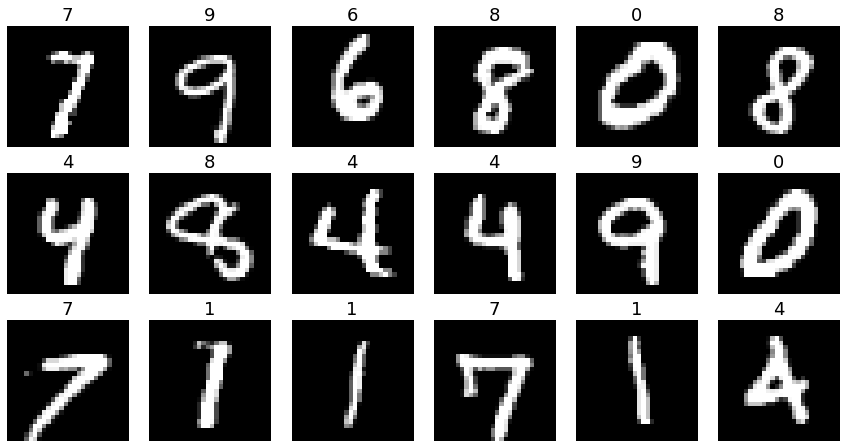

In [13]:
digits, image_stats = load_mnist()
show_random_training_images(digits, image_stats)

### Problem 3.1

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

def evaluate(h, data, forest=False):
    def error_rate(predictor, samples):
        x, y = samples['x'], samples['y']
        return (1 - predictor.score(x, y)) * 100
    
    h.fit(data['train']['x'], data['train']['y'])

    e_train = error_rate(h, data['train'])
    e_test = error_rate(h, data['test'])
    print("Training Error: {}".format(round(e_train,3)))
    print("Testing Error: {}".format(round(e_test,3)))
    
    if forest:
        oob = (1 - h.oob_score_)*100
        print("Out-of-Bag Error Rate: {}".format(round(oob, 3)))
    
    preds = h.predict(data['test']['x'])
    c_matrix = confusion_matrix(data['test']['y'], preds)
    p = ConfusionMatrixDisplay(c_matrix)
    p.plot()
    plt.show()

Training Error: 0.0
Testing Error: 12.26


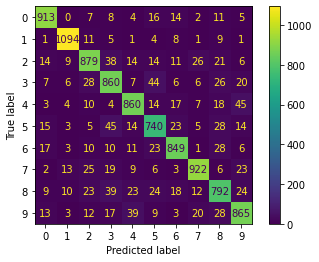

CPU times: user 20.4 s, sys: 105 ms, total: 20.5 s
Wall time: 20.6 s


In [39]:
tree = DecisionTreeClassifier()

%time evaluate(mnist_tree, digits)

### Problem 3.2 (Exam Style)

According to the confusion matrix above, the digits 3 and 5 are often confused with each other which resulted in 42 images that were actually 3 being classified as 5 and 42 images that were actually 5 being classified as 3. Since the number of images misclassified as the opposite number is equivalent for both digits, this confusion does appear to be symmetric. 

It seems more likely that the decision tree is overfit rather than underfit since the training error is 0.0 and all of the training samples were correctly classified. This makes sense given that fully grown decision trees perform recursive binary splitting until each region of the classifier is composed of only a single class (Gini Index = 0). Since no limitations were placed on the classifier to prevent this from happening, the decision tree was fit exactly to the training data. 

### Problem 3.3

Training Error: 0.0
Testing Error: 2.95
Out-of-Bag Error Rate: 0.03491666666666671


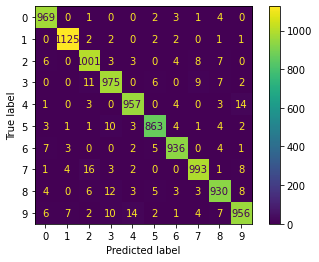

CPU times: user 43.9 s, sys: 707 ms, total: 44.6 s
Wall time: 44.7 s


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True)
%time evaluate(rf, digits, True)

### Problem 3.4 (Exam Style)

The largest non-diagonal entry in the confusion matrix was for digits whose true value was 7, but their predicted value was 2. This confusion does to appear to be symmetric since only 8 digits were misclassified as a 7 when their true value was 2. 

The random forest appears to overfit less than the earlier decision tree based on the much lower testing error. The training error was still 0.0, indicating that all training points are classfied correctly, but the lower testing error suggests that this close fit to the training data is appropriate in this case (or at least more than for the decision tree in 3.1). The out-of-bag error estimate is actually higher than the actual test error but only by about 0.5, so it does appear that the out-of-bag error estimate is a reasonable estimate of the test error rate.

### Problem 3.5 (Exam Style)

The random forest classifier took approximately twice as long to train as the decision tree (runtime ratio = 44.7/20.6 $\approx$ 2.17). If all 100 of the trees in the decision forest were trained in the same way as the single decision tree, we should expect the training time to be 100 times more for the decision forest compared to the single decision tree classifier. The random forest classifier only considers a subset of the predictors when fitting each tree. This greatly reduces the number of potential boundaries (which is (N)) to be computed when trying to find the optimal split each time 